In [ ]:
# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ✅ Install required packages
!pip install tifffile matplotlib opencv-python torch torchvision
!pip install git+https://github.com/bowang-lab/MedSAM.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
# ✅ Créer le dossier de destination
!mkdir -p /content/work_dir/MedSAM/



In [ ]:
# ✅ Téléverser le modèle depuis ton PC vers Colab
from google.colab import files
uploaded = files.upload()

# ✅ Déplacer le fichier téléversé
!mv medsam_vit_b.pth /content/work_dir/MedSAM/medsam_vit_b.pth
medsam_ckpt = '/content/work_dir/MedSAM/medsam_vit_b.pth'

KeyboardInterrupt: 

In [ ]:
# ✅ Dézipper glaucome.zip dans /content/
import zipfile

zip_path = "/content/drive/MyDrive/Colab Notebooks/glaucoma.zip"
extract_path = "/content/glaucoma"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Décompression terminée.")


✅ Décompression terminée.


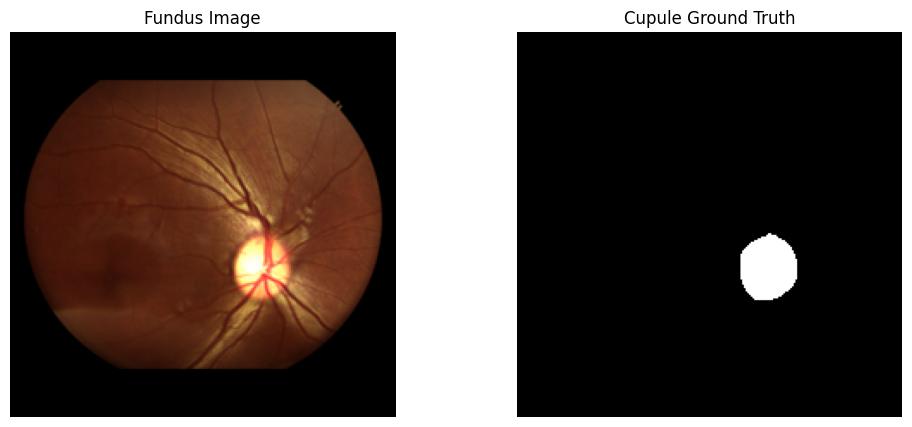

In [ ]:
# ✅ Load TIFF image + cupule mask (adapt path to your Drive folder)
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

# ⚠️ Remplace par le nom réel d'une image présente dans ton dossier
image_path = '/content/glaucoma/glaucoma/images/000056.tiff'
mask_path = '/content/glaucoma/glaucoma/supplementary_material/masks/cup/000056.tiff'



image = tiff.imread(image_path)
mask = tiff.imread(mask_path)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Fundus Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Cupule Ground Truth')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# ✅ Cloner MedSAM et l’installer en mode édition
!git clone https://github.com/bowang-lab/MedSAM.git
%cd MedSAM
!pip install -e .
%cd /content


Cloning into 'MedSAM'...
remote: Enumerating objects: 967, done.
remote: Counting objects: 100% (354/354), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 967 (delta 286), reused 237 (delta 237), pack-reused 613 (from 2)
Receiving objects: 100% (967/967), 62.89 MiB | 45.68 MiB/s, done.
Resolving deltas: 100% (479/479), done.
/content/MedSAM
Obtaining file:///content/MedSAM
  Preparing metadata (setup.py) ... done
  Attempting uninstall: medsam
    Found existing installation: medsam 0.0.1
    Uninstalling medsam-0.0.1:
      Successfully uninstalled medsam-0.0.1
  Running setup.py develop for medsam
/content


In [ ]:
# 1. Aller à la racine de travail
%cd /content

# 2. Cloner SAM officiel (par Meta AI)
!git clone https://github.com/facebookresearch/segment-anything.git

# 3. Installer le module
%cd segment-anything
!pip install -e .

# 4. Revenir à ton dossier principal
%cd /content


/content
Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 23.50 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment_anything
/content


In [ ]:
import sys
sys.path.append('/content/segment-anything')  # ou le bon chemin si tu l’as renommé

from segment_anything import sam_model_registry
print("✅ Import réussi !")


✅ Import réussi !


In [ ]:
!ls -lh /content/work_dir/MedSAM/medsam_vit_b.pth

import torch
from segment_anything import sam_model_registry

# Chemin du checkpoint
ckpt_path = '/content/work_dir/MedSAM/medsam_vit_b.pth'

# Choix du device
device = "cuda" if torch.cuda.is_available() else "cpu"
print("✅ Utilisation du device :", device)

# Chargement du modèle
medsam_model = sam_model_registry["vit_b"](checkpoint=ckpt_path)
medsam_model.to(device)
medsam_model.eval()

print("✅ Modèle MedSAM chargé avec succès !")


-rw-r--r-- 1 root root 358M Aug  6 14:50 /content/work_dir/MedSAM/medsam_vit_b.pth
✅ Utilisation du device : cuda
✅ Modèle MedSAM chargé avec succès !


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
import torch
import torch.nn.functional as F
from segment_anything import sam_model_registry

def show_mask(mask, ax):
    color = np.array([251 / 255, 252 / 255, 30 / 255, 0.6])  # Jaune translucide
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor="blue", facecolor=(0, 0, 0, 0), lw=2))

@torch.no_grad()
def medsam_inference(medsam_model, img_embed, box_1024, H, W):
    box_torch = torch.as_tensor(box_1024, dtype=torch.float, device=img_embed.device)
    if len(box_torch.shape) == 2:
        box_torch = box_torch[:, None, :]
    sparse_embeddings, dense_embeddings = medsam_model.prompt_encoder(points=None, boxes=box_torch, masks=None)
    low_res_logits, _ = medsam_model.mask_decoder(
        image_embeddings=img_embed,
        image_pe=medsam_model.prompt_encoder.get_dense_pe(),
        sparse_prompt_embeddings=sparse_embeddings,
        dense_prompt_embeddings=dense_embeddings,
        multimask_output=False,
    )
    low_res_pred = torch.sigmoid(low_res_logits)
    low_res_pred = F.interpolate(low_res_pred, size=(H, W), mode="bilinear", align_corners=False)
    return (low_res_pred.squeeze().cpu().numpy() > 0.5).astype(np.uint8)

def run_medsam_inference(img_path, bbox, checkpoint_path):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = sam_model_registry["vit_b"](checkpoint=checkpoint_path).to(device)
    model.eval()

    img_np = io.imread(img_path)
    if len(img_np.shape) == 2:
        img_3c = np.repeat(img_np[:, :, None], 3, axis=-1)
    else:
        img_3c = img_np
    H, W, _ = img_3c.shape

    img_1024 = transform.resize(img_3c, (1024, 1024), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
    img_1024 = (img_1024 - img_1024.min()) / np.clip(img_1024.max() - img_1024.min(), 1e-8, None)
    img_tensor = torch.tensor(img_1024).float().permute(2, 0, 1).unsqueeze(0).to(device)

    box_np = np.array([bbox])
    box_1024 = box_np / np.array([W, H, W, H]) * 1024
    image_embedding = model.image_encoder(img_tensor)
    seg = medsam_inference(model, image_embedding, box_1024, H, W)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img_3c)
    show_box(box_np[0], ax[0])
    ax[0].set_title("Image + Boîte")
    ax[1].imshow(img_3c)
    show_mask(seg, ax[1])
    show_box(box_np[0], ax[1])
    ax[1].set_title("Segmentation MedSAM")
    plt.show()

    return seg


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


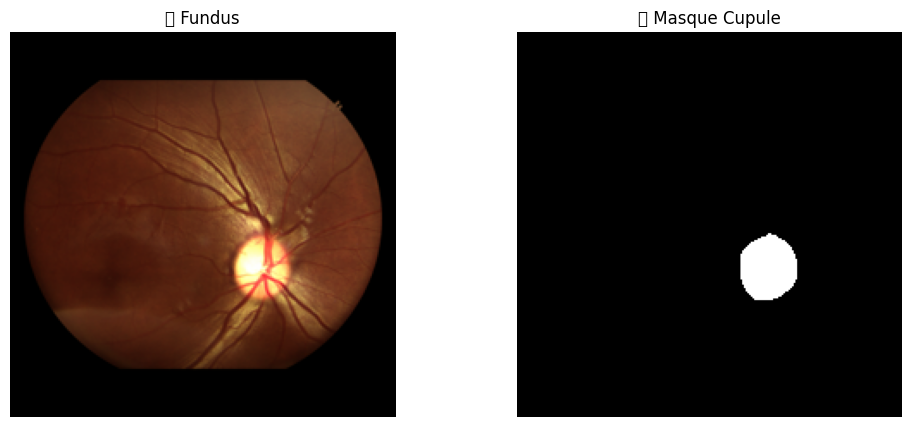

In [ ]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np


# ⚠️ Remplace par le nom réel d'une image présente dans ton dossier
image_path = '/content/glaucoma/glaucoma/images/000056.tiff'
mask_path = '/content/glaucoma/glaucoma/supplementary_material/masks/cup/000056.tiff'



image = tiff.imread(image_path)
mask = tiff.imread(mask_path)

# Affichage
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("🖼 Fundus")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("🎯 Masque Cupule")
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
# Trouver les coordonnées de la boîte englobante
ys, xs = np.where(mask > 0)
x_min, x_max = xs.min(), xs.max()
y_min, y_max = ys.min(), ys.max()
bbox = [x_min, y_min, x_max, y_max]

print("📦 Bounding box =", bbox)


📦 Bounding box = [np.int64(130), np.int64(117), np.int64(162), np.int64(155)]


In [ ]:
from skimage import transform
import torch.nn.functional as F
import torch

# 1. Dimensions de l’image originale
H, W = image.shape[:2]

# 2. Vérifie si l’image est déjà RGB (forme H, W, 3)
if image.ndim == 2 or image.shape[2] != 3:
    image_rgb = np.stack([image]*3, axis=-1)
else:
    image_rgb = image

# 3. Resize et normalisation
image_resized = transform.resize(
    image_rgb, (1024, 1024),
    preserve_range=True,
    anti_aliasing=True
).astype(np.uint8)

# 4. Conversion en tenseur PyTorch
image_tensor = torch.tensor(image_resized / 255., dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

# 5. Mise à l’échelle de la bounding box vers 1024x1024
bbox_scaled = np.array([bbox]) / np.array([W, H, W, H]) * 1024
bbox_tensor = torch.as_tensor(bbox_scaled, dtype=torch.float, device=device).unsqueeze(1)  # (B, 1, 4)

# 6. Prédiction avec MedSAM
with torch.no_grad():
    image_embedding = medsam_model.image_encoder(image_tensor)

    sparse_embeddings, dense_embeddings = medsam_model.prompt_encoder(
        boxes=bbox_tensor, points=None, masks=None
    )

    low_res_logits, _ = medsam_model.mask_decoder(
        image_embeddings=image_embedding,
        image_pe=medsam_model.prompt_encoder.get_dense_pe(),
        sparse_prompt_embeddings=sparse_embeddings,
        dense_prompt_embeddings=dense_embeddings,
        multimask_output=False
    )

# 7. Interpolation et seuillage de la sortie
low_res_pred = torch.sigmoid(low_res_logits)
pred_mask = F.interpolate(
    low_res_pred, size=(H, W),
    mode='bilinear', align_corners=False
)
pred_mask = (pred_mask.squeeze().cpu().numpy() > 0.5).astype(np.uint8)

print("✅ Masque prédictif généré avec succès !")


✅ Masque prédictif généré avec succès !


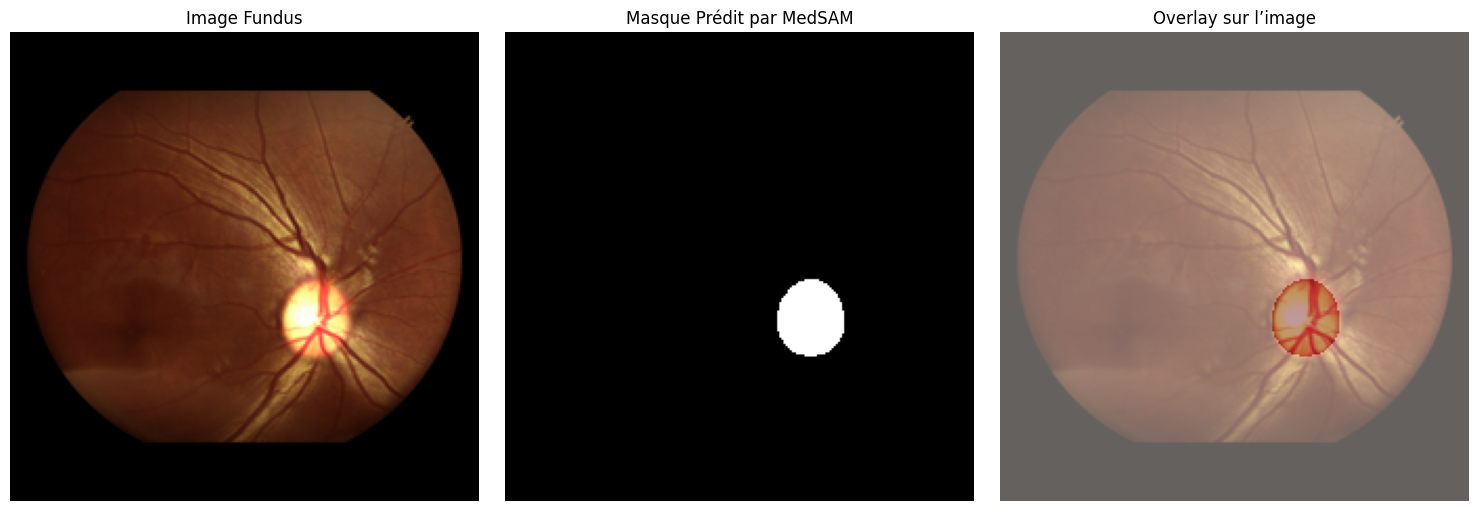

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Image d'origine
plt.subplot(1, 3, 1)
plt.title('Image Fundus')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Masque prédictif seul
plt.subplot(1, 3, 2)
plt.title('Masque Prédit par MedSAM')
plt.imshow(pred_mask, cmap='gray')
plt.axis('off')

# Superposition
plt.subplot(1, 3, 3)
plt.title('Overlay sur l’image')
plt.imshow(image, cmap='gray')
plt.imshow(pred_mask, cmap='Reds', alpha=0.4)
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import jaccard_score

# Flatten les masques pour la comparaison
jaccard = jaccard_score(mask.flatten(), pred_mask.flatten(), average='binary')
print(f"🎯 Jaccard Index (IoU) : {jaccard:.4f}")


🎯 Jaccard Index (IoU) : 0.9175


In [ ]:
import os
import glob
import numpy as np
import torch
import tifffile as tiff
from skimage import transform
import torch.nn.functional as F
from tqdm import tqdm

# Dossiers
image_dir = '/content/glaucoma/glaucoma/images/'
output_dir = '/content/glaucoma/glaucoma/pred_masks/'
os.makedirs(output_dir, exist_ok=True)

# GPU ou CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
medsam_model.eval()

# Fonction de prédiction MedSAM
def predict_cup_mask(image_path):
    image = tiff.imread(image_path)

    # Assure que l’image est bien en RGB
    if len(image.shape) == 2:
        image_rgb = np.stack([image] * 3, axis=-1)
    elif len(image.shape) == 3 and image.shape[2] == 3:
        image_rgb = image
    else:
        raise ValueError(f"Image {image_path} shape inconnue: {image.shape}")

    H, W = image_rgb.shape[:2]

    # Resize à 1024x1024 pour MedSAM
    image_resized = transform.resize(image_rgb, (1024, 1024), preserve_range=True, anti_aliasing=True).astype(np.uint8)
    image_tensor = torch.tensor(image_resized / 255., dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

    # Définir une bbox centrale large
    bbox = [W // 4, H // 4, 3 * W // 4, 3 * H // 4]
    bbox_scaled = np.array([bbox]) / np.array([W, H, W, H]) * 1024
    bbox_tensor = torch.as_tensor(bbox_scaled, dtype=torch.float32, device=device).unsqueeze(1)

    with torch.no_grad():
        image_embedding = medsam_model.image_encoder(image_tensor)

        sparse_embeddings, dense_embeddings = medsam_model.prompt_encoder(
            points=None,
            boxes=bbox_tensor,
            masks=None
        )

        low_res_logits, _ = medsam_model.mask_decoder(
            image_embeddings=image_embedding,
            image_pe=medsam_model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
            multimask_output=False
        )

        low_res_pred = torch.sigmoid(low_res_logits)
        mask = F.interpolate(low_res_pred, size=(H, W), mode="bilinear", align_corners=False)
        mask = (mask > 0.5).float().cpu().numpy()[0, 0]

        return mask

# Lancer la prédiction sur toutes les images .tiff
all_images = sorted(glob.glob(os.path.join(image_dir, '*.tiff')))
print(f"Nombre d’images à traiter : {len(all_images)}")

for img_path in tqdm(all_images):
    try:
        pred_mask = predict_cup_mask(img_path)
        img_name = os.path.basename(img_path)
        out_path = os.path.join(output_dir, img_name)
        tiff.imwrite(out_path, (pred_mask * 255).astype(np.uint8))
    except Exception as e:
        print(f"⚠️ Erreur avec {img_path} : {e}")


Nombre d’images à traiter : 1345


100%|██████████| 1345/1345 [14:03<00:00,  1.59it/s]


In [ ]:
import os
import glob
import numpy as np
import tifffile as tiff
from tqdm import tqdm

# Dossiers
pred_dir = '/content/glaucoma/glaucoma/pred_masks/'
gt_dir = '/content/glaucoma/glaucoma/supplementary_material/masks/cup/'

# Métriques
def compute_iou(pred, gt):
    intersection = np.logical_and(pred, gt).sum()
    union = np.logical_or(pred, gt).sum()
    return intersection / union if union > 0 else 1.0

def compute_dice(pred, gt):
    intersection = np.logical_and(pred, gt).sum()
    return (2 * intersection) / (pred.sum() + gt.sum()) if (pred.sum() + gt.sum()) > 0 else 1.0

# Fichiers
pred_files = sorted(glob.glob(os.path.join(pred_dir, '*.tiff')))
ious = []
dices = []

print(f"Évaluation de {len(pred_files)} images...")

for pred_path in tqdm(pred_files):
    img_name = os.path.basename(pred_path)
    gt_path = os.path.join(gt_dir, img_name)

    if not os.path.exists(gt_path):
        print(f"Masque ground-truth manquant pour {img_name}")
        continue

    pred_mask = tiff.imread(pred_path) > 127  # binaire
    gt_mask = tiff.imread(gt_path) > 127      # binaire

    iou = compute_iou(pred_mask, gt_mask)
    dice = compute_dice(pred_mask, gt_mask)

    ious.append(iou)
    dices.append(dice)




Évaluation de 1345 images...


100%|██████████| 1345/1345 [00:01<00:00, 946.03it/s]


Unique valeurs dans masque prédit : [  0 255]
Unique valeurs dans masque réel   : [False  True]


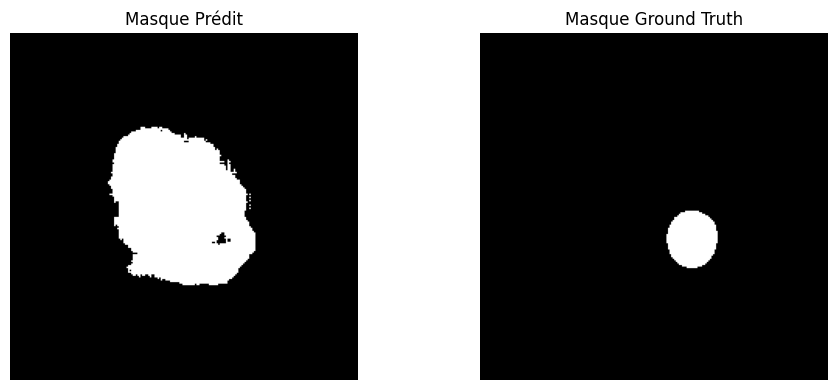

In [ ]:
import matplotlib.pyplot as plt

# Lire un exemple au hasard
index = 0
example_pred_path = pred_files[index]
example_gt_path = os.path.join(gt_dir, os.path.basename(example_pred_path))

pred_mask = tiff.imread(example_pred_path)
gt_mask = tiff.imread(example_gt_path)

print("Unique valeurs dans masque prédit :", np.unique(pred_mask))
print("Unique valeurs dans masque réel   :", np.unique(gt_mask))

# Affichage
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Masque Prédit")
plt.imshow(pred_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Masque Ground Truth")
plt.imshow(gt_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import os
import glob
import torch
import tifffile as tiff
import numpy as np
from tqdm import tqdm
from skimage import transform
import torch.nn.functional as F

# === 📁 Dossiers ===
image_dir = '/content/glaucoma/glaucoma/images/'
mask_dir = '/content/glaucoma/glaucoma/supplementary_material/masks/cup/'

# === 📏 Fonctions métriques ===
def compute_iou(pred, gt):
    intersection = np.logical_and(pred, gt).sum()
    union = np.logical_or(pred, gt).sum()
    return intersection / union if union > 0 else 1.0

def compute_dice(pred, gt):
    intersection = np.logical_and(pred, gt).sum()
    return (2 * intersection) / (pred.sum() + gt.sum()) if (pred.sum() + gt.sum()) > 0 else 1.0

# === 📦 Fonction bbox ===
def get_bbox(mask):
    ys, xs = np.where(mask > 0)
    if len(xs) == 0 or len(ys) == 0:
        return None
    return [xs.min(), ys.min(), xs.max(), ys.max()]

# === 🔮 Fonction prédiction avec MedSAM ===
def predict_with_bbox(image, bbox, device='cuda'):
    H, W = image.shape[:2]
    image_rgb = np.stack([image]*3, axis=-1) if image.ndim == 2 else image

    image_resized = transform.resize(image_rgb, (1024, 1024), preserve_range=True, anti_aliasing=True).astype(np.uint8)
    image_tensor = torch.tensor(image_resized / 255., dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

    bbox_scaled = np.array([bbox]) / np.array([W, H, W, H]) * 1024
    bbox_tensor = torch.as_tensor(bbox_scaled, dtype=torch.float, device=device).unsqueeze(1)

    with torch.no_grad():
        image_embedding = medsam_model.image_encoder(image_tensor)
        sparse_embeddings, dense_embeddings = medsam_model.prompt_encoder(
            boxes=bbox_tensor, points=None, masks=None
        )
        low_res_logits, _ = medsam_model.mask_decoder(
            image_embeddings=image_embedding,
            image_pe=medsam_model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
            multimask_output=False
        )
        low_res_pred = torch.sigmoid(low_res_logits)
        mask = F.interpolate(low_res_pred, size=(H, W), mode="bilinear", align_corners=False)
        return (mask.squeeze().cpu().numpy() > 0.5).astype(np.uint8)

# === ✅ Filtrage des 50 premières images avec masque valide ===
valid_image_paths = []
valid_mask_paths = []

for img_path in sorted(glob.glob(os.path.join(image_dir, '*.tiff'))):
    img_name = os.path.basename(img_path)
    mask_path = os.path.join(mask_dir, img_name)

    if not os.path.exists(mask_path):
        continue

    gt_mask = tiff.imread(mask_path)

    if np.any(gt_mask):  # booléen ou 0/1
        valid_image_paths.append(img_path)
        valid_mask_paths.append(mask_path)

    if len(valid_image_paths) >= 50:
        break

print(f"✅ {len(valid_image_paths)} images sélectionnées avec masque cupule non vide.")

# === 📊 Évaluation ===
iou_scores, dice_scores = [], []

for img_path, mask_path in tqdm(zip(valid_image_paths, valid_mask_paths), total=len(valid_image_paths)):
    image = tiff.imread(img_path)
    gt_mask = tiff.imread(mask_path)
    gt_mask_bin = gt_mask.astype(np.uint8)

    bbox = get_bbox(gt_mask_bin)
    if bbox is None:
        continue

    try:
        pred_mask = predict_with_bbox(image, bbox)
        iou = compute_iou(pred_mask, gt_mask_bin)
        dice = compute_dice(pred_mask, gt_mask_bin)
        iou_scores.append(iou)
        dice_scores.append(dice)
    except Exception as e:
        print(f"❌ Erreur sur {os.path.basename(img_path)} : {e}")
        continue

# === 📈 Résultats ===
print(f"\n📈 Résultats sur {len(iou_scores)} images :")
print(f"  🔹 IoU moyen   = {np.mean(iou_scores):.4f}")
print(f"  🔹 Dice moyen  = {np.mean(dice_scores):.4f}")


✅ 50 images sélectionnées avec masque cupule non vide.


100%|██████████| 50/50 [00:31<00:00,  1.58it/s]


📈 Résultats sur 50 images :
  🔹 IoU moyen   = 0.8668
  🔹 Dice moyen  = 0.9248


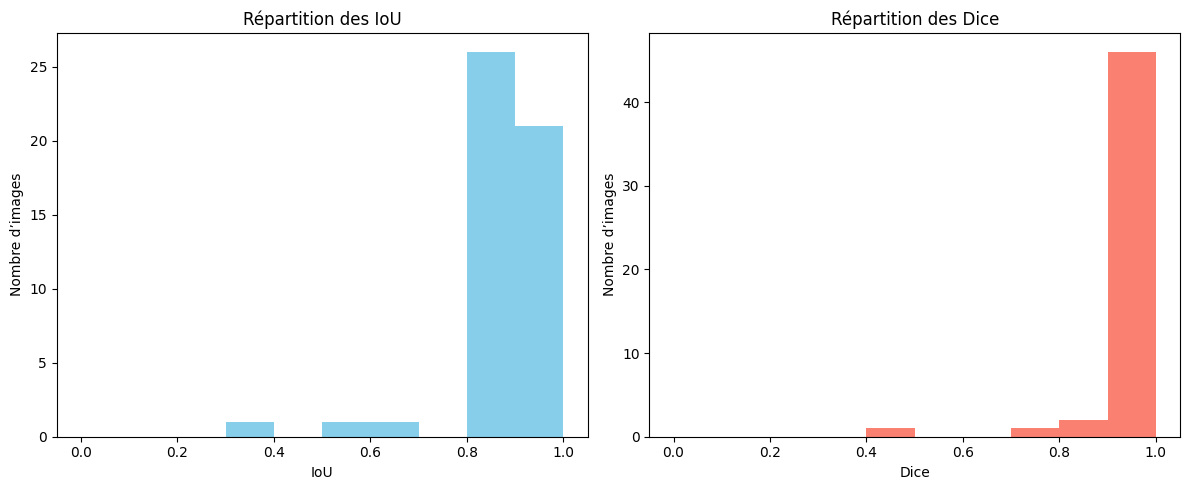

In [ ]:
import matplotlib.pyplot as plt

# 📊 Histogrammes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(iou_scores, bins=10, range=(0, 1), color='skyblue')
plt.title('Répartition des IoU')
plt.xlabel('IoU')
plt.ylabel('Nombre d’images')

plt.subplot(1, 2, 2)
plt.hist(dice_scores, bins=10, range=(0, 1), color='salmon')
plt.title('Répartition des Dice')
plt.xlabel('Dice')
plt.ylabel('Nombre d’images')

plt.tight_layout()
plt.show()


/tmp/ipython-input-203811687.py:28: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-203811687.py:28: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


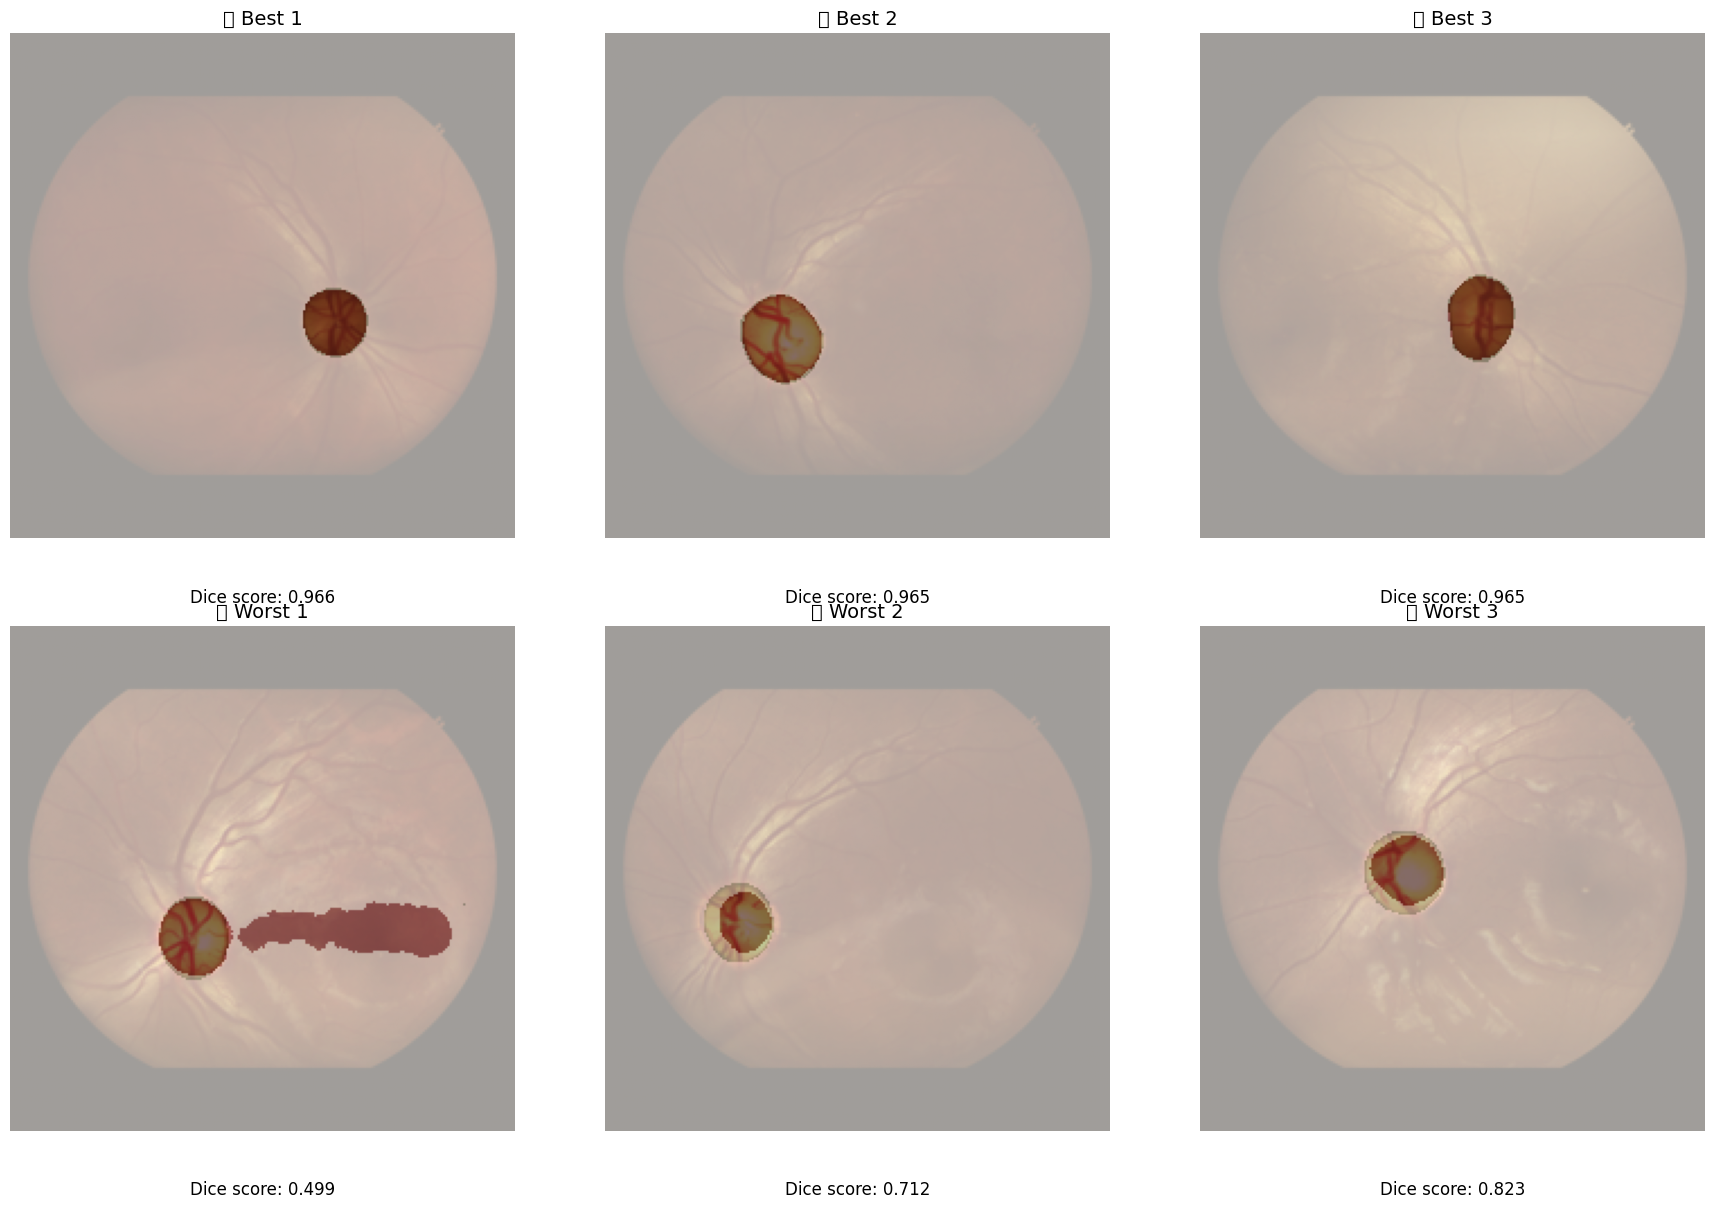

In [ ]:
# 🎯 Sélectionner les 3 meilleures et pires indices
best_idx = np.argsort(dice_scores)[-3:][::-1]   # top 3
worst_idx = np.argsort(dice_scores)[:3]         # bottom 3

selected_indices = list(best_idx) + list(worst_idx)
titles = ['✅ Best 1', '✅ Best 2', '✅ Best 3', '❌ Worst 1', '❌ Worst 2', '❌ Worst 3']

plt.figure(figsize=(18, 12))

for i, idx in enumerate(selected_indices):
    image = tiff.imread(valid_image_paths[idx])
    gt_mask = tiff.imread(valid_mask_paths[idx]).astype(np.uint8)
    pred_mask = predict_with_bbox(image, get_bbox(gt_mask))

    dice = dice_scores[idx]  # récupère le score de Dice de cette image

    plt.subplot(2, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.imshow(gt_mask, cmap='Greens', alpha=0.4)
    plt.imshow(pred_mask, cmap='Reds', alpha=0.4)
    plt.axis('off')

    plt.title(titles[i], fontsize=14)
    # 📌 Ajouter le score Dice en dessous
    plt.text(0.5, -0.1, f'Dice score: {dice:.3f}', fontsize=12,
             ha='center', va='top', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Charger le fichier de labels
labels = np.load('/content/glaucoma/glaucoma/task_labels/Glaucoma suspect.npy')

# Liste des indices (images) où le label = 1 (glaucome)
glaucoma_indices = [i for i, label in enumerate(labels) if label == 1]

# Convertir les indices en noms de fichiers
glaucoma_images = [f"{i:06d}.tiff" for i in glaucoma_indices]

# Afficher les 10 premières
print("🩺 Images glaucomateuses détectées :")
print(glaucoma_images[:10])
print(f"Total glaucome détecté : {len(glaucoma_images)} images")


🩺 Images glaucomateuses détectées :
['000031.tiff', '000032.tiff', '000040.tiff', '000044.tiff', '000047.tiff', '000061.tiff', '000064.tiff', '000067.tiff', '000071.tiff', '000073.tiff']
Total glaucome détecté : 188 images


In [ ]:
import os
import torch
import tifffile as tiff
import torch.nn.functional as F
from skimage import transform
from tqdm import tqdm

cdr_list = []
y_true = []
y_pred = []

for i in tqdm(glaucoma_indices[:50]):  # ← tu peux tester avec 50 d'abord
    try:
        image_path = f"/content/glaucoma/glaucoma/images/{i:06d}.tiff"
        cup_path   = f"/content/glaucoma/glaucoma/supplementary_material/masks/cup/{i:06d}.tiff"
        disc_path  = f"/content/glaucoma/glaucoma/supplementary_material/masks/disc/{i:06d}.tiff"

        image = tiff.imread(image_path)
        H, W = image.shape[:2]

        # Convertir en RGB
        if image.ndim == 2 or image.shape[2] != 3:
            image_rgb = np.stack([image]*3, axis=-1)
        else:
            image_rgb = image

        # Resize + normalisation
        image_resized = transform.resize(image_rgb, (1024, 1024), preserve_range=True, anti_aliasing=True).astype(np.uint8)
        image_tensor = torch.tensor(image_resized / 255., dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

        # Fonction pour prédire un masque avec MedSAM
        def predict_with_bbox(gt_mask_path):
            gt_mask = tiff.imread(gt_mask_path)
            ys, xs = np.where(gt_mask > 0)
            bbox = [xs.min(), ys.min(), xs.max(), ys.max()]
            bbox_scaled = np.array([bbox]) / np.array([W, H, W, H]) * 1024
            bbox_tensor = torch.as_tensor(bbox_scaled, dtype=torch.float, device=device).unsqueeze(1)

            with torch.no_grad():
                image_embedding = medsam_model.image_encoder(image_tensor)
                sparse_embeddings, dense_embeddings = medsam_model.prompt_encoder(
                    boxes=bbox_tensor, points=None, masks=None
                )
                low_res_logits, _ = medsam_model.mask_decoder(
                    image_embeddings=image_embedding,
                    image_pe=medsam_model.prompt_encoder.get_dense_pe(),
                    sparse_prompt_embeddings=sparse_embeddings,
                    dense_prompt_embeddings=dense_embeddings,
                    multimask_output=False
                )
            pred_mask = torch.sigmoid(low_res_logits)
            pred_mask = F.interpolate(pred_mask, size=(H, W), mode='bilinear', align_corners=False)
            return (pred_mask.squeeze().cpu().numpy() > 0.5).astype(np.uint8)

        # Prédiction cupule + disque
        pred_cup = predict_with_bbox(cup_path)
        pred_disc = predict_with_bbox(disc_path)

        area_cup = np.sum(pred_cup)
        area_disc = np.sum(pred_disc)

        if area_disc == 0:
            continue  # éviter division par 0

        cdr = area_cup / area_disc
        pred_label = 1 if cdr > 0.6 else 0

        # Stockage
        cdr_list.append(cdr)
        y_true.append(1)  # car que des glaucomateux
        y_pred.append(pred_label)

    except Exception as e:
        print(f"Erreur avec l’image {i:06d}: {e}")


100%|██████████| 50/50 [00:51<00:00,  1.03s/it]


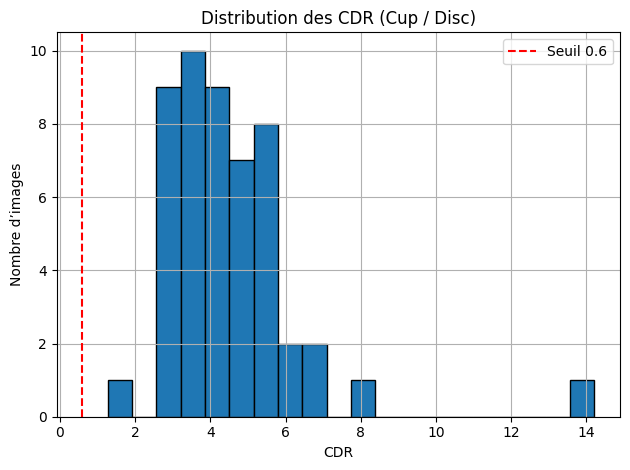

In [ ]:
import matplotlib.pyplot as plt

plt.hist(cdr_list, bins=20, edgecolor='black')
plt.axvline(0.6, color='red', linestyle='--', label='Seuil 0.6')
plt.title('Distribution des CDR (Cup / Disc)')
plt.xlabel('CDR')
plt.ylabel('Nombre d’images')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from segment_anything import sam_model_registry
import torch

ckpt_path = "/content/work_dir/MedSAM/medsam_vit_b.pth"
device = "cuda" if torch.cuda.is_available() else "cpu"
print("✅ Device =", device)

medsam_model = sam_model_registry["vit_b"](checkpoint=ckpt_path)
medsam_model.to(device)
medsam_model.eval()
print("✅ MedSAM chargé avec succès !")


✅ Device = cuda
✅ MedSAM chargé avec succès !


In [ ]:
import os

# Dossiers d’images et de masques ground-truth
image_dir = "/content/glaucoma/glaucoma/images"
gt_cup_dir = "/content/glaucoma/glaucoma/supplementary_material/masks/cup"
gt_disc_dir = "/content/glaucoma/glaucoma/supplementary_material/masks/disc"

# Dossiers de sortie pour les prédictions
pred_cup_dir = "/content/glaucoma/pred_masks/cup"
pred_disc_dir = "/content/glaucoma/pred_masks/disc"
os.makedirs(pred_cup_dir, exist_ok=True)
os.makedirs(pred_disc_dir, exist_ok=True)


In [ ]:
import numpy as np
from skimage import transform
import torch.nn.functional as F
import tifffile as tiff

def predict_mask_from_bbox(image, bbox, model, device):
    H, W = image.shape[:2]

    if image.ndim == 2 or image.shape[2] != 3:
        image_rgb = np.stack([image]*3, axis=-1)
    else:
        image_rgb = image

    image_resized = transform.resize(image_rgb, (1024, 1024), preserve_range=True).astype(np.uint8)
    image_tensor = torch.tensor(image_resized / 255., dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)

    bbox_scaled = np.array([bbox]) / np.array([W, H, W, H]) * 1024
    bbox_tensor = torch.as_tensor(bbox_scaled, dtype=torch.float, device=device).unsqueeze(1)

    with torch.no_grad():
        image_embedding = model.image_encoder(image_tensor)
        sparse_embeddings, dense_embeddings = model.prompt_encoder(boxes=bbox_tensor, points=None, masks=None)
        low_res_logits, _ = model.mask_decoder(
            image_embeddings=image_embedding,
            image_pe=model.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
            multimask_output=False
        )
        low_res_pred = torch.sigmoid(low_res_logits)
        pred_mask = F.interpolate(low_res_pred, size=(H, W), mode="bilinear", align_corners=False)
        return (pred_mask.squeeze().cpu().numpy() > 0.5).astype(np.uint8)


In [35]:
from tqdm import tqdm

image_names = sorted(os.listdir(image_dir))

for img_name in tqdm(image_names[:1345], desc="🔁 Génération des masques prédits"):
    try:
        # Charger image + masques GT
        img_path = os.path.join(image_dir, img_name)
        cup_gt_path = os.path.join(gt_cup_dir, img_name)
        disc_gt_path = os.path.join(gt_disc_dir, img_name)

        if not os.path.exists(cup_gt_path) or not os.path.exists(disc_gt_path):
            continue

        image = tiff.imread(img_path)
        cup_gt = tiff.imread(cup_gt_path)
        disc_gt = tiff.imread(disc_gt_path)

        # ➤ Cupule
        ys, xs = np.where(cup_gt > 0)
        if len(xs) > 0:
            bbox_cup = [xs.min(), ys.min(), xs.max(), ys.max()]
            pred_cup = predict_mask_from_bbox(image, bbox_cup, medsam_model, device)
            tiff.imwrite(os.path.join(pred_cup_dir, img_name), pred_cup.astype(np.uint8))

        # ➤ Disque
        ys, xs = np.where(disc_gt > 0)
        if len(xs) > 0:
            bbox_disc = [xs.min(), ys.min(), xs.max(), ys.max()]
            pred_disc = predict_mask_from_bbox(image, bbox_disc, medsam_model, device)
            tiff.imwrite(os.path.join(pred_disc_dir, img_name), pred_disc.astype(np.uint8))

    except Exception as e:
        print(f"⚠️ Erreur avec {img_name} : {e}")


🔁 Génération des masques prédits: 100%|██████████| 1345/1345 [27:59<00:00,  1.25s/it]


In [36]:
import numpy as np
import os
import tifffile as tiff
from tqdm import tqdm

# Dossiers où les masques prédits ont été enregistrés
pred_cup_dir = "/content/glaucoma/pred_masks/cup"
pred_disc_dir = "/content/glaucoma/pred_masks/disc"

cdr_list = []
img_ids = []

for i in tqdm(range(1345), desc="📏 Calcul des CDR"):
    img_name = f"{i:06d}.tiff"
    cup_path = os.path.join(pred_cup_dir, img_name)
    disc_path = os.path.join(pred_disc_dir, img_name)

    if os.path.exists(cup_path) and os.path.exists(disc_path):
        cup = tiff.imread(cup_path).astype(bool)
        disc = tiff.imread(disc_path).astype(bool)

        if disc.sum() == 0:
            continue  # éviter division par 0

        cdr = cup.sum() / disc.sum()
        cdr_list.append(cdr)
        img_ids.append(i)

cdr_array = np.array(cdr_list)


📏 Calcul des CDR: 100%|██████████| 1345/1345 [00:01<00:00, 1247.22it/s]


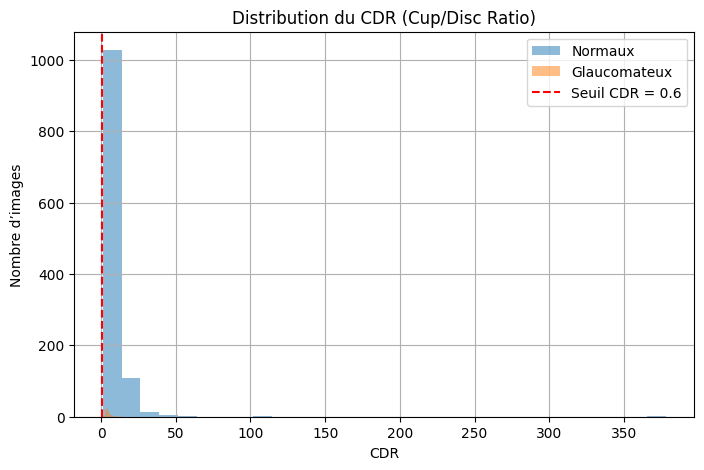

In [37]:
label_path = "/content/glaucoma/glaucoma/task_labels/Glaucoma suspect.npy"
all_labels = np.load(label_path)
y_true = all_labels[img_ids]  # On prend uniquement les labels des images traitées
threshold = 0.6  # à ajuster
y_pred = (cdr_array > threshold).astype(int)
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


# Visualisation des distributions
plt.figure(figsize=(8,5))
plt.hist(cdr_array[y_true==0], bins=30, alpha=0.5, label="Normaux")
plt.hist(cdr_array[y_true==1], bins=30, alpha=0.5, label="Glaucomateux")
plt.axvline(threshold, color='red', linestyle='--', label=f"Seuil CDR = {threshold}")
plt.xlabel("CDR")
plt.ylabel("Nombre d’images")
plt.title("Distribution du CDR (Cup/Disc Ratio)")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-2882296340.py:42: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2882296340.py:42: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2882296340.py:42: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.ca

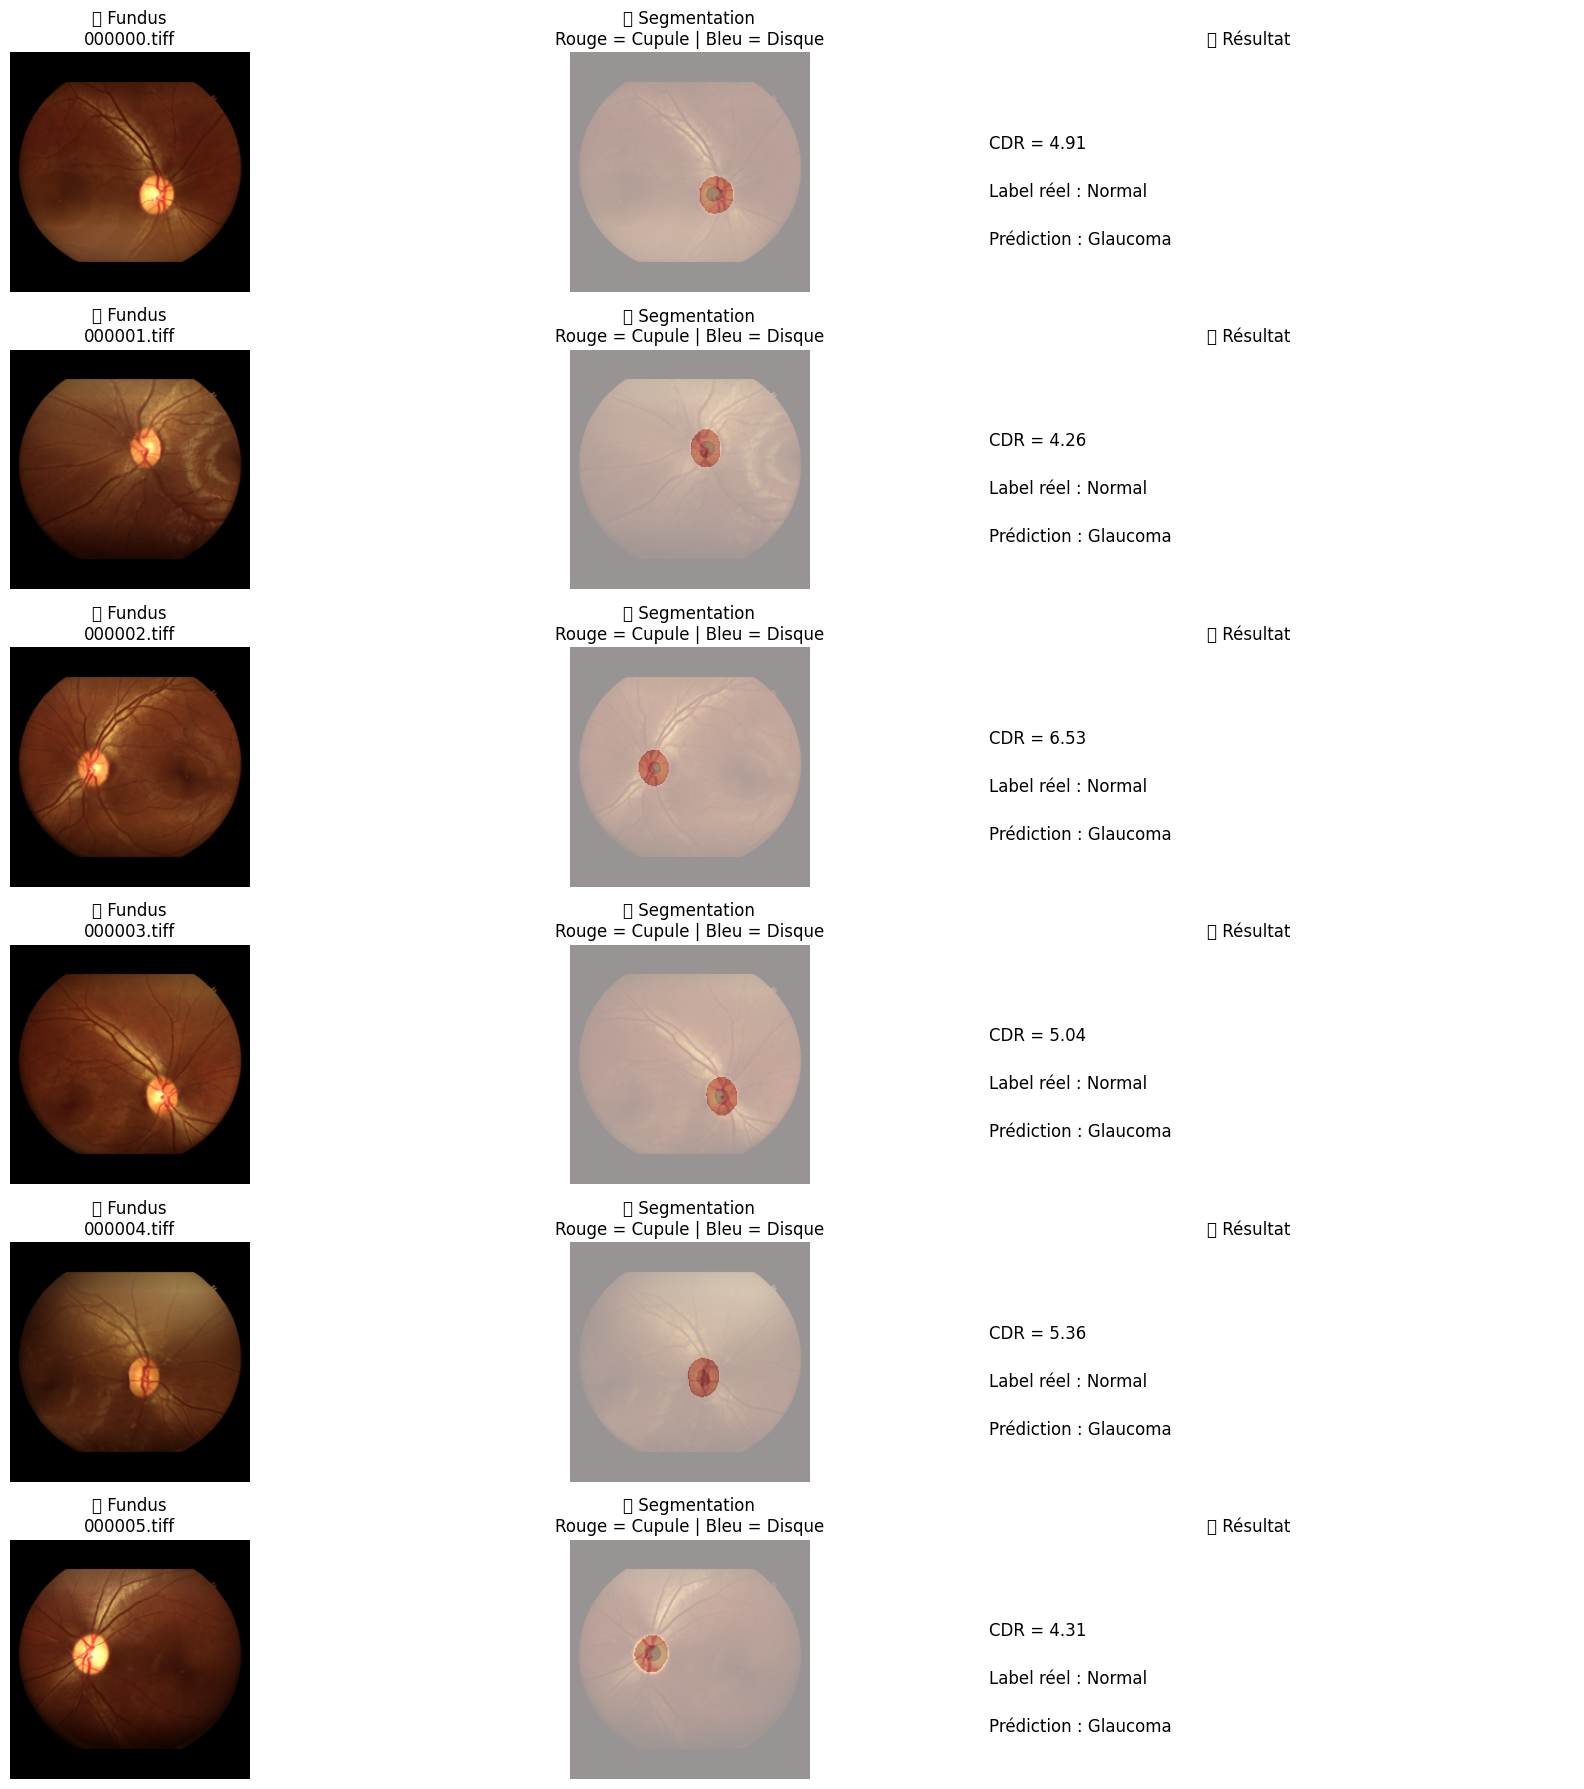

In [38]:
import matplotlib.pyplot as plt

# Dossier image original
image_dir = "/content/glaucoma/glaucoma/images"

# On choisit combien d’images à afficher
n_show = 6

plt.figure(figsize=(18, 3 * n_show))

for i, idx in enumerate(img_ids[:n_show]):
    img_name = f"{idx:06d}.tiff"
    image = tiff.imread(os.path.join(image_dir, img_name))
    cup = tiff.imread(os.path.join(pred_cup_dir, img_name))
    disc = tiff.imread(os.path.join(pred_disc_dir, img_name))

    cdr = cup.sum() / disc.sum() if disc.sum() > 0 else 0
    label_real = "Glaucoma" if y_true[i] == 1 else "Normal"
    label_pred = "Glaucoma" if y_pred[i] == 1 else "Normal"

    plt.subplot(n_show, 3, 3 * i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"🖼 Fundus\n{img_name}")
    plt.axis('off')

    plt.subplot(n_show, 3, 3 * i + 2)
    plt.imshow(disc, cmap='Blues', alpha=0.6)
    plt.imshow(cup, cmap='Reds', alpha=0.6)
    plt.imshow(image, cmap='gray', alpha=0.4)
    plt.title("🎯 Segmentation\nRouge = Cupule | Bleu = Disque")
    plt.axis('off')

    plt.subplot(n_show, 3, 3 * i + 3)
    plt.text(0.1, 0.6, f"CDR = {cdr:.2f}", fontsize=12)
    plt.text(0.1, 0.4, f"Label réel : {label_real}", fontsize=12)
    plt.text(0.1, 0.2, f"Prédiction : {label_pred}", fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    plt.title("🔍 Résultat")

plt.tight_layout()
plt.show()


In [40]:
# Standard library imports
import os
import ast

# Third-party general imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from PIL import Image

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Additional Keras imports
from keras.utils import to_categorical

# Imports from Google Colab
from google.colab import files

In [41]:
uploaded = files.upload()

!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k
!unzip -q ocular-disease-recognition-odir5k.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k
License(s): other
 99% 1.61G/1.62G [00:19<00:00, 131MB/s]
100% 1.62G/1.62G [00:19<00:00, 87.9MB/s]


In [42]:
df_data = pd.read_csv('full_df.csv')
df_data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [43]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training, test and validation sets
train_df, test_df = train_test_split(df_data, test_size=0.2, random_state=123)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=123)

In [44]:
# Function to load and preprocess images
def parse_image_and_label(image_path, label_string):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [299,299])
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.xception.preprocess_input(image)  # Preprocessing the image to be compatible with pretrained model
    # Assuming label_string is the string representation of the list (e.g., "[1, 0, 0]")
    label = tf.strings.substr(label_string, 1, tf.strings.length(label_string) - 2)  # Remove brackets
    label = tf.strings.to_number(tf.strings.split(label, ','), out_type=tf.float32)
    return image, label

In [45]:
def file_exists(file_paths):
    # Filter out non-existing files
    return [file_path for file_path in file_paths if os.path.exists(file_path)]

def load_and_prepare_dataset(df, images_dir, shuffle=True, batch_size=32):
    images_left = images_dir + df['Left-Fundus']
    images_right = images_dir + df['Right-Fundus']

    labels_left = df['target'].values
    labels_right = df['target'].values

    # Combine the left and right images and labels
    filenames = np.concatenate([images_left, images_right])
    labels = np.concatenate([labels_left, labels_right])

    # Filter out filenames that do not exist
    valid_filenames = file_exists(filenames)
    valid_labels = labels[np.isin(filenames, valid_filenames)]  # Keep labels corresponding to the valid filenames

    # Creating TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((valid_filenames, valid_labels))
    dataset = dataset.map(parse_image_and_label)  # Apply the preprocessing function
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(valid_filenames))
    dataset = dataset.batch(batch_size)
    return dataset


In [49]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.measure import regionprops, label
from tqdm import tqdm

# Dossiers
image_dir = "/content/glaucoma/glaucoma/images"
pred_cup_dir = "/content/glaucoma/pred_masks/cup"
pred_disc_dir = "/content/glaucoma/pred_masks/disc"

# Fonction d'extraction des biomarqueurs
def extract_biomarkers(cup_mask_path, disc_mask_path):
    cup_mask = imread(cup_mask_path, as_gray=True) > 0
    disc_mask = imread(disc_mask_path, as_gray=True) > 0

    props_cup = regionprops(label(cup_mask))
    props_disc = regionprops(label(disc_mask))

    if not props_cup or not props_disc:
        return [0, 0, 0, 0, 0]

    props_cup = props_cup[0]
    props_disc = props_disc[0]

    cdr = props_cup.bbox[2] / props_disc.bbox[2]  # Hauteur cup/disc
    area_cup = props_cup.area
    area_disc = props_disc.area
    centroid_distance = np.linalg.norm(np.array(props_cup.centroid) - np.array(props_disc.centroid))
    eccentricity = props_cup.eccentricity

    return [cdr, area_cup, area_disc, centroid_distance, eccentricity]

# 📊 Extraction pour chaque image
biomarker_data = []
image_names = sorted(os.listdir(image_dir))

for img_name in tqdm(image_names, desc="📐 Extraction des biomarqueurs"):
    if not img_name.endswith(".tiff"):
        continue

    image_id = img_name.replace(".tiff", "")
    cup_path = os.path.join(pred_cup_dir, img_name)
    disc_path = os.path.join(pred_disc_dir, img_name)

    if os.path.exists(cup_path) and os.path.exists(disc_path):
        biomarkers = extract_biomarkers(cup_path, disc_path)
        biomarker_data.append([image_id] + biomarkers)

# Création du DataFrame
columns = ["image_id", "cdr", "area_cup", "area_disc", "centroid_dist", "eccentricity"]
df_biomarkers = pd.DataFrame(biomarker_data, columns=columns)

# Sauvegarde CSV
csv_path = "/content/glaucoma/glaucoma_biomarkers_predicted.csv"
df_biomarkers.to_csv(csv_path, index=False)
print(f"✅ Biomarqueurs sauvegardés dans : {csv_path}")


📐 Extraction des biomarqueurs: 100%|██████████| 1345/1345 [00:04<00:00, 331.58it/s]


✅ Biomarqueurs sauvegardés dans : /content/glaucoma/glaucoma_biomarkers_predicted.csv
